In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load the data to workspace

In [ ]:
!cp -r "/content/drive/My Drive/dl/x1.zip" /content/
!cp -r "/content/drive/My Drive/dl/x2.zip" /content/
!cp -r "/content/drive/My Drive/dl/x3.zip" /content/
!cp -r "/content/drive/My Drive/dl/x4.zip" /content/
!cp "/content/drive/My Drive/dl/y.zip" /content/
!unzip y.zip
!unzip x1.zip
!unzip x2.zip
!unzip x3.zip
!unzip x4.zip
!mkdir x
!cp -a "/content/x1/." /content/x/
!cp -a "/content/x2/." /content/x/
!cp -a "/content/x3/." /content/x/
!cp -a "/content/x4/." /content/x/
!rm y.zip
!rm x1.zip
!rm x2.zip
!rm x3.zip
!rm x4.zip
!rm -r x1
!rm -r x2
!rm -r x3
!rm -r x4

In [0]:
!rm -r /content/*

Load libraries 

In [0]:

import numpy as np
import math
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout, Add, BatchNormalization,Conv1D, advanced_activations, UpSampling2D,Reshape
from keras.optimizers import Adam
from keras.models import Model
from keras import losses
import cv2
import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, SGD
from google.colab.patches import cv2_imshow
from keras.utils.vis_utils import plot_model
import cv2 as cv

Load the data from colab workspace to runtime variables

In [0]:
train_img = []
ground_truth = []
file_list1 = np.sort(os.listdir('/content/x/'))
file_list2 = np.sort(os.listdir('/content/y/'))
for i in tqdm.tqdm(range(0, len(file_list1))):
    ground_truth.append(cv2.resize(cv2.imread('/content/y/' + file_list2[i], 0),(640,480)))
    train_img.append(cv2.resize(cv2.imread('/content/x/' + file_list1[i], 1),(640,480)))

100%|██████████| 2480/2480 [00:24<00:00, 101.52it/s]


In [0]:
np.shape(ground_truth[0])

(480, 640, 3)

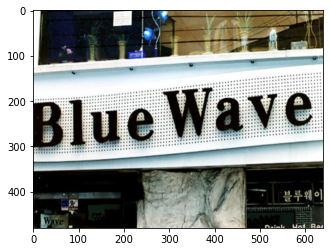

In [0]:
#cv2_imshow(ground_truth[30])
plt.imshow(train_img[30])

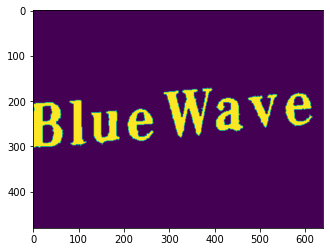

In [0]:
plt.imshow(ground_truth[30])

In [0]:
np.random.seed(0)
train_img = np.array(train_img)
ground_truth = np.array(ground_truth)
train_img = train_img.reshape((-1, 480,640, 3))
ground_truth = ground_truth.reshape((-1, 480, 640, 1))
train_x, val_x, train_y, val_y = train_test_split(train_img, ground_truth, test_size=0.2)
del train_img
del ground_truth

In [0]:
print(np.shape(train_x),np.shape(val_x))

(1984, 480, 640, 3) (496, 480, 640, 3)


In [0]:

input_img = Input(shape=(480, 640, 3)) #RGB Image
x = Conv2D(16, (3, 3), padding='same')(input_img)
x = advanced_activations.LeakyReLU()(x)
x = Conv2D(16, (3, 3), padding='same')(input_img)
x = advanced_activations.LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), padding='same')(encoded)
x = advanced_activations.LeakyReLU()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = advanced_activations.LeakyReLU()(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), padding='same', activation='linear')(x) #Grey Scale image

MindNet = Model(input_img, decoded)
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
opt = SGD(lr=0.001, momentum=0.9) 
MindNet.compile(optimizer=adam, loss='mean_squared_error')


In [0]:
MindNet.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 480, 640, 16)      448       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 480, 640, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 240, 320, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 240, 320, 32)      4640      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 240, 320, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 120, 160, 32)      0   

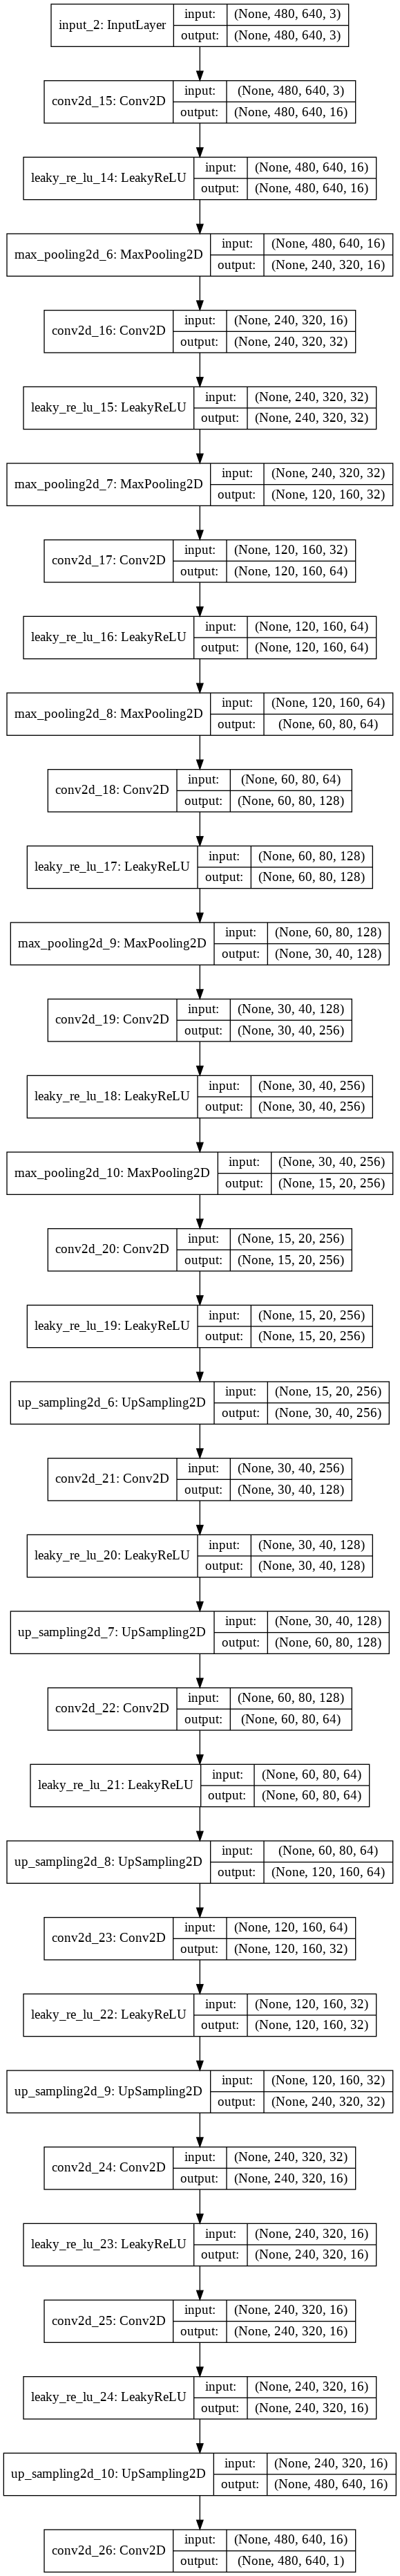

In [0]:
plot_model(MindNet, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
checkpointer = ModelCheckpoint(filepath='./weights.best.3.hdf5', 
                               verbose = 1, 
                               save_best_only = True) # verbose =1 is for printing the output
history=MindNet.fit(train_x, train_y,
                epochs=15,
                batch_size=8,
                shuffle=True,
                validation_data=(val_x, val_y),
                callbacks = [checkpointer])

In [0]:
!cp "/content/drive/My Drive/dl/weights.best.1.hdf5" /content/
!cp "/content/drive/My Drive/dl/weights.best.2.hdf5" /content/
!cp "/content/drive/My Drive/dl/weights.best.3.hdf5" /content/

In [0]:
MindNet.load_weights("./weights.best.1.hdf5")

In [0]:
!cp /content/weights.best.1.hdf5 "/content/drive/My Drive/dl/"
!cp /content/weights.best.2.hdf5 "/content/drive/My Drive/dl/"
!cp /content/weights.best.3.hdf5 "/content/drive/My Drive/dl/"

In [0]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

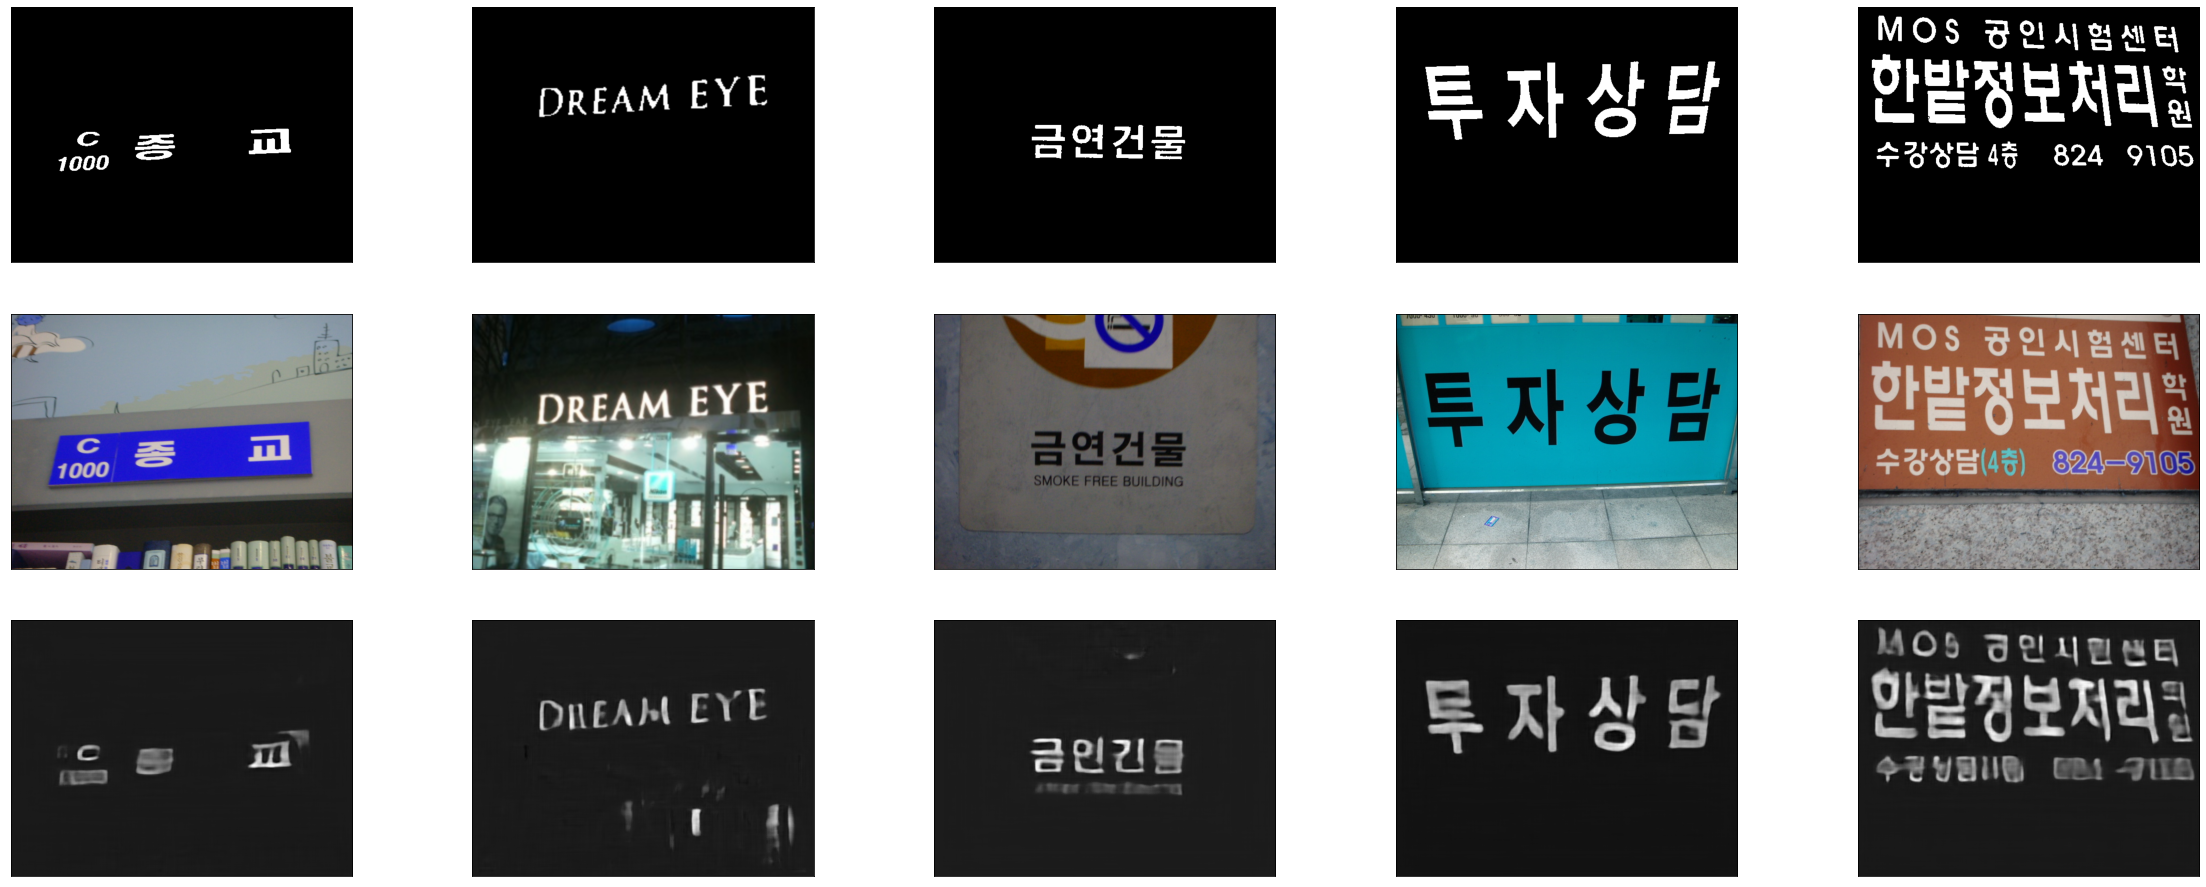

In [0]:


decoded_imgs = MindNet.predict(val_x)
x=28
n = 5
plt.figure(figsize=(40, 16))
for i in range(x,n+x):
    # display original
    ax = plt.subplot(3, n, i-x+1)
    plt.imshow(val_y[i+10].reshape(480,640))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    
    ax = plt.subplot(3, n, i+n-x+1)
    plt.imshow(val_x[i+10].reshape(480,640,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 2*n-x+1)
    plt.imshow(decoded_imgs[i+10].reshape(480,640))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [0]:
# serialize model to JSON
model_json = MindNet.to_json()
with open("modelMindNet.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
MindNet.save_weights("modelMindNet.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# load json and create model
json_file = open('modelMindNet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
MindNet = model_from_json(loaded_model_json)


In [0]:
# load weights into new model
MindNet.load_weights("modelMindNet.h5")
print("Loaded model from disk")